In [1]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(42)

In [5]:
employees = [f"Employee_{i}" for i in range(1,31)]

In [9]:
date = pd.date_range(start="2025-07-01", periods = 30, freq ="D")

In [11]:
data =  pd.DataFrame({
    "Date":np.tile(date, len(employees)),
    "Employee_ID":np.repeat(employees, len(date)),
    "Working_hours":np.random.normal(loc = 20, scale=5, size=len(date)*len(employees))
})
                   

In [13]:
df = pd.DataFrame(data)
df

,Date,Employee_ID,Working_hours
0,2025-07-01,Employee_1,22.483571
1,2025-07-02,Employee_1,19.308678
2,2025-07-03,Employee_1,23.238443
3,2025-07-04,Employee_1,27.615149
4,2025-07-05,Employee_1,18.829233
...,...,...,...
895,2025-07-26,Employee_30,23.243549
896,2025-07-27,Employee_30,19.164410
897,2025-07-28,Employee_30,20.733568
898,2025-07-29,Employee_30,26.032545


In [17]:
df.to_csv("employee_working_hours.csv" , index =False)

In [19]:
df_csv =pd.read_csv("employee_working_hours.csv")

In [23]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_hours
0  2025-07-01  Employee_1      22.483571
1  2025-07-02  Employee_1      19.308678
2  2025-07-03  Employee_1      23.238443
3  2025-07-04  Employee_1      27.615149
4  2025-07-05  Employee_1      18.829233
       Working_hours
count     900.000000
mean       20.091926
std         4.904530
min         3.793663
25%        16.745590
50%        20.092131
75%        23.246901
max        39.263657
30


In [27]:
total_hours = df_csv.groupby("Employee_ID")["Working_hours"].sum().sort_values(ascending=False)
total_hours

Employee_ID
Employee_30    662.606134
Employee_21    649.712002
Employee_11    642.282391
Employee_6     641.817993
Employee_13    634.225898
Employee_29    631.906799
Employee_26    628.785713
Employee_28    622.726849
Employee_10    616.074819
Employee_20    613.164300
Employee_7     609.838848
Employee_8     607.205434
Employee_16    606.985293
Employee_14    604.314773
Employee_27    603.784449
Employee_3     601.932716
Employee_4     596.962256
Employee_24    594.304245
Employee_15    591.394231
Employee_19    586.585246
Employee_5     585.756283
Employee_2     581.825629
Employee_23    580.485134
Employee_22    579.695120
Employee_9     578.485218
Employee_1     571.777966
Employee_17    570.315585
Employee_25    569.284734
Employee_12    569.016727
Employee_18    549.480581
Name: Working_hours, dtype: float64

In [29]:
avg_daily = df_csv.groupby("Employee_ID")["Working_hours"].mean()

In [37]:
threshold_low = 5
threshold_high = 9
df_csv["Low_Hour_Flag"] = df_csv["Working_hours"] < threshold_low
df_csv["High_Hour_Flag"] = df_csv["Working_hours"] > threshold_high

#view flagged rows
print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head())

         Date Employee_ID  Working_hours  Low_Hour_Flag  High_Hour_Flag
0  2025-07-01  Employee_1      22.483571          False            True
1  2025-07-02  Employee_1      19.308678          False            True
2  2025-07-03  Employee_1      23.238443          False            True
3  2025-07-04  Employee_1      27.615149          False            True
4  2025-07-05  Employee_1      18.829233          False            True


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

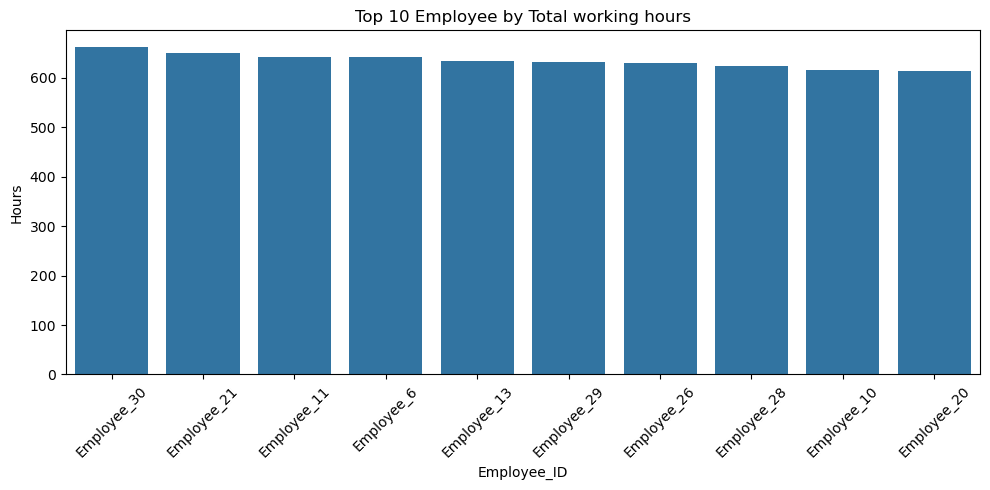

In [41]:
top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employee by Total working hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

In [43]:
row = df.iloc[30]
row

Date             2025-07-01 00:00:00
Employee_ID               Employee_2
Working_hours              16.991467
Name: 30, dtype: object